In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2022-11-16 19:39:19.526922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 19:39:19.666790: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-16 19:39:19.674768: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 19:39:19.674801: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

train data:  (60000, 28, 28)
train labels:  (60000,)
test data:  (10000, 28, 28)
test labels:  (10000,)


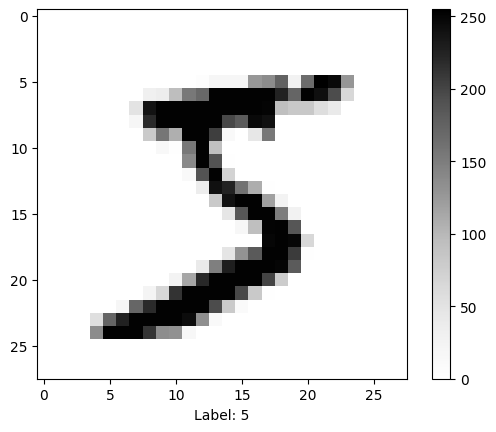

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print('train data: ', train_images.shape)
print('train labels: ', train_labels.shape)

print('test data: ', test_images.shape)
print('test labels: ', test_labels.shape)

# Show sample image
plt.figure()
plt.imshow(train_images[0], cmap='Greys')
plt.xlabel('Label: ' + str(train_labels[0]))
plt.colorbar()
plt.grid(False)
plt.show()

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# model = Sequential([
#   layers.Rescaling(1./255, input_shape=(28, 28)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(10)
# ])

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2393 - accuracy: 0.9448
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.9496
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1943 - accuracy: 0.9514
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1892 - accuracy: 0.9528
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1812 - accuracy: 0.9546
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1767 - accuracy: 0.9561
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1702 - accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1761 - accuracy: 0.9569
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1674 - accuracy: 0.9589
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.162

In [77]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test set accuracy:', test_acc)

313/313 - 1s - loss: 0.3222 - accuracy: 0.9484 - 672ms/epoch - 2ms/step
Test set accuracy: 0.9484000205993652


1/1 [==============================] - 0s 64ms/step


2

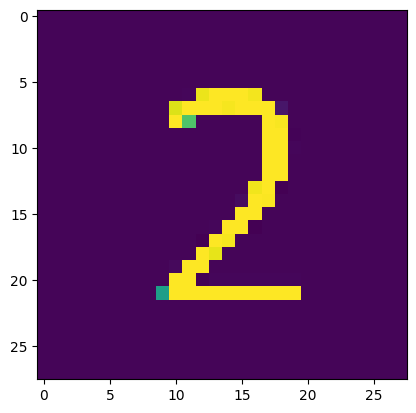

In [78]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

tsimage = plt.imread('../test_images/2.jpg')
# tsimage = tsimage / 255
tsimage = 255 - tsimage
tsimage = tf.image.rgb_to_grayscale(tsimage, name=None)
tsimage = tf.image.resize(tsimage, (28, 28))
tsimage = tf.squeeze(tsimage)

plt.imshow(tsimage)
tsimage = (np.expand_dims(tsimage,0))

prediction = probability_model.predict(tsimage)
np.argmax(prediction[0])


In [80]:
model.save('../models/mnist_model')

INFO:tensorflow:Assets written to: ../models/mnist_model/assets
